
## TECHIN513:  Lab 1 - Elementary Music Synthesis

**Team Members**: 

**Overview**

The purpose of this lab is to familiarize you with constructing and processing discrete-time audio signals. You will review how to synthesize music notes and play them. You will concatenate a series of music notes into a small music piece, add volume variation to the music piece, overlap the adjacent notes to further make the music smoother and more realistic.

Through this process, you will learn to perform the following sound synthesis tasks:
- Generating musical notes
- Improving the quality of the generated sound
- Overlapping notes

In [10]:
import numpy as np
import IPython.display as ipd
# Usage:
# ipd.Audio(audio_array, rate=sampling_rate, autoplay=True)
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.io import wavfile as wav

In [11]:
# SimpleAudio constants.
DEFAULT_SAMPLE_RATE = 8000
DEFAULT_AMPLITUDE = 1
DEFAULT_BYTES_PER_SAMPLE = 2
DEFAULT_NUM_CHANNELS = 1

# Musical note frequencies.
A = 220.0
B = A * 2 ** (2 / 12)
C = A * 2 ** (3 / 12)
E = A * 2 ** (7 / 12)

In [13]:
def play(data, num_channels=DEFAULT_NUM_CHANNELS, bytes_per_sample=DEFAULT_BYTES_PER_SAMPLE,
         sample_rate=DEFAULT_SAMPLE_RATE):
    """Returns a playable audio object

    Args:
        data: The audio data to be played (as a NumPy array).
        num_channels: The number of audio channels.
        bytes_per_sample: The number of bytes per sample per channel.
        sample_rate: The sample rate.
    """
    # Enter code here
    return ipd.Audio(data, rate=sample_rate, autoplay=True)
    
    
def display_envelope(signal, duration=-1, sample_rate=DEFAULT_SAMPLE_RATE, bytes_per_sample=DEFAULT_BYTES_PER_SAMPLE):

    """
    Plots the envelope of a duration of the generated audio. 

    Args:
        signal: The audio signal to be displayed (as a NumPy array).
        duration: The length of hte signal to be displayed. -1 to display entire signal.
        num_channels: The number of audio channels.
        bytes_per_sample: The number of bytes per sample per channel.
        sample_rate: The sample rate.
    """
    
    if duration < 0:
        duration = len(signal)/sample_rate
    
    n = int(duration*sample_rate)
    
    analytic_signal = hilbert(signal[0:n])
    amplitude_envelope = np.abs(analytic_signal)
        
    t = np.linspace(0,duration,len(amplitude_envelope))
    
    plt.figure()    
    plt.plot(t,amplitude_envelope)
    plt.show()

## Task 1: Generating Musical Notes

In [14]:
# defining note function 
def note(frequency, duration, amplitude=DEFAULT_AMPLITUDE, sample_rate=DEFAULT_SAMPLE_RATE):
    """Generates samples of a musical note.

    Samples are generated according to following equation:

        y(t) = A sin(wt)

    Args:
        frequency: The frequency of the note.
        duration: The length of the note in seconds.
        amplitude: The amplitude of the note.
        sample_rate: The sample rate.

    Returns:
        An array of samples representing the note.
    """
    # Enter code here
    num_samples = int(sample_rate * duration)
    t = np.linspace(0, duration, num_samples, endpoint=False)
    y = amplitude * np.sin(2 * np.pi * frequency * t)
    return y

### Visualize the sinusoid waves for A, B, C, and E

Note A: Frequency = 220.00 Hz, Period = 0.004545 seconds (4.545 ms)
Note B: Frequency = 246.94 Hz, Period = 0.004050 seconds (4.050 ms)
Note C: Frequency = 261.63 Hz, Period = 0.003822 seconds (3.822 ms)
Note E: Frequency = 329.63 Hz, Period = 0.003034 seconds (3.034 ms)


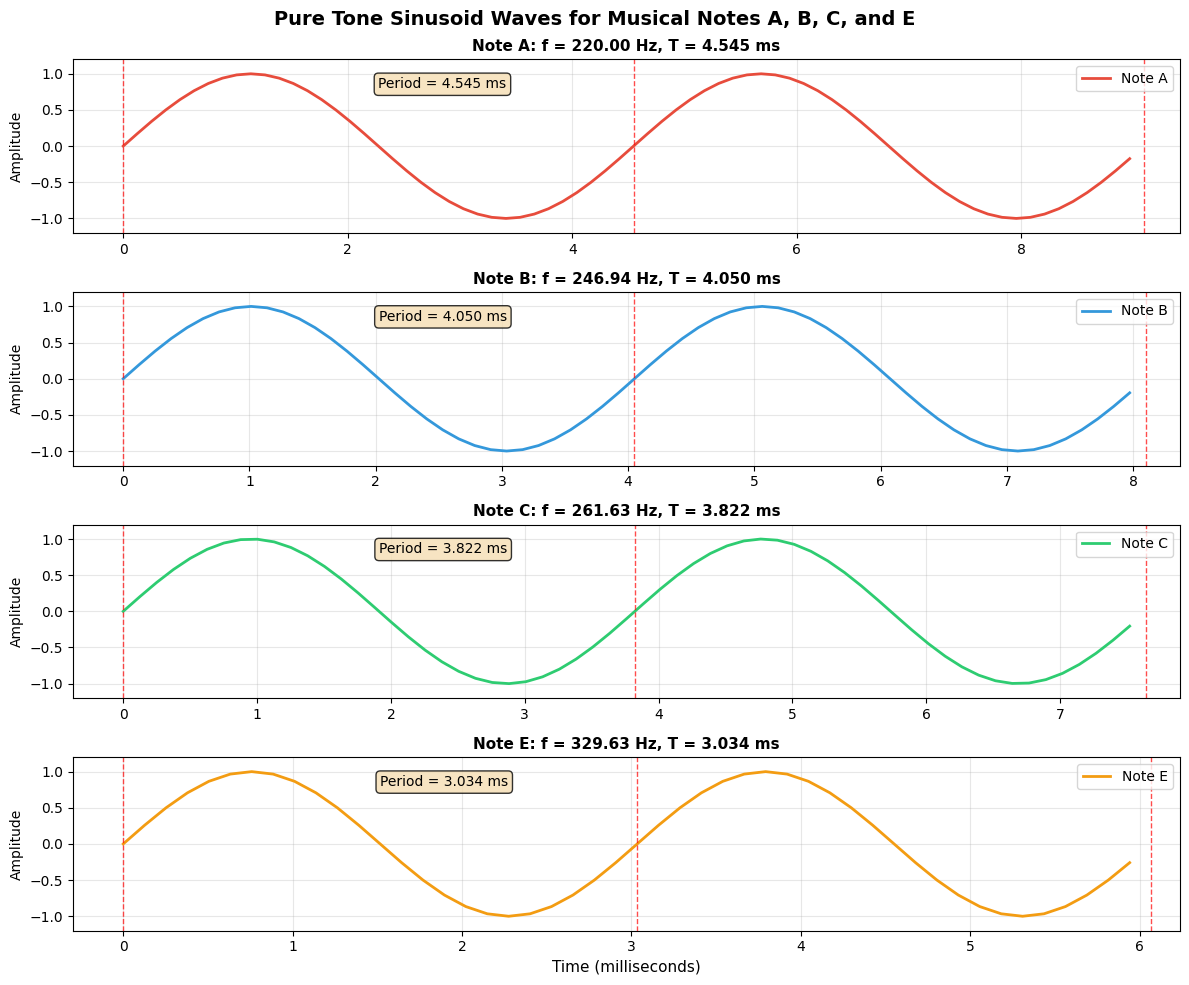


VERIFICATION FROM PLOTS:
From the plots, you can verify that:
1. Note A (220.00 Hz) completes one cycle every 4.545 ms
2. Note B (246.94 Hz) completes one cycle every 4.050 ms
3. Note C (261.63 Hz) completes one cycle every 3.822 ms
4. Note E (329.63 Hz) completes one cycle every 3.034 ms

Higher frequencies (like E) have shorter periods (faster oscillations).
Lower frequencies (like A) have longer periods (slower oscillations).


In [15]:
# Calculate periods for each note
# Period T = 1 / frequency
notes = {
    'A': A,
    'B': B,
    'C': C,
    'E': E
}

periods = {}
for note_name, freq in notes.items():
    period = 1 / freq
    periods[note_name] = period
    print(f"Note {note_name}: Frequency = {freq:.2f} Hz, Period = {period:.6f} seconds ({period*1000:.3f} ms)")

print("=" * 60)

# Generate notes - show 3 periods of each note for better visualization
duration_multiplier = 2 # show 2 period

fig, axes = plt.subplots(4, 1, figsize=(12, 10))
fig.suptitle('Pure Tone Sinusoid Waves for Musical Notes A, B, C, and E', 
             fontsize=14, fontweight='bold')

colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']

for idx, (note_name, freq) in enumerate(notes.items()):
    # Generate signal for 3 periods
    duration = periods[note_name] * duration_multiplier
    signal = note(freq, duration)
    
    # Time array for plotting
    t = np.linspace(0, duration, len(signal), endpoint=False)
    
    # Plot
    ax = axes[idx]
    ax.plot(t * 1000, signal, color=colors[idx], linewidth=2, label=f'Note {note_name}')
    
    # Mark periods with vertical lines
    for i in range(duration_multiplier + 1):
        ax.axvline(x=i * periods[note_name] * 1000, color='red', linestyle="--", linewidth=1, alpha=0.7)
    
    # Add period annotation
    mid_period = periods[note_name] * 1000 / 2
    ax.annotate(f'Period = {periods[note_name]*1000:.3f} ms', 
               xy=(mid_period, 0.8), fontsize=10, 
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    ax.set_ylabel('Amplitude', fontsize=10)
    ax.set_ylim(-1.2, 1.2)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right', fontsize=10)
    ax.set_title(f'Note {note_name}: f = {freq:.2f} Hz, T = {periods[note_name]*1000:.3f} ms', 
                fontsize=11, fontweight='bold')

# Set x-label only for the bottom subplot
axes[-1].set_xlabel('Time (milliseconds)', fontsize=11)

plt.tight_layout()
plt.show()

# Verification
print("\nVERIFICATION FROM PLOTS:")
print("=" * 60)
print("From the plots, you can verify that:")
print(f"1. Note A (220.00 Hz) completes one cycle every {periods['A']*1000:.3f} ms")
print(f"2. Note B ({B:.2f} Hz) completes one cycle every {periods['B']*1000:.3f} ms")
print(f"3. Note C ({C:.2f} Hz) completes one cycle every {periods['C']*1000:.3f} ms")
print(f"4. Note E ({E:.2f} Hz) completes one cycle every {periods['E']*1000:.3f} ms")
print("\nHigher frequencies (like E) have shorter periods (faster oscillations).")
print("Lower frequencies (like A) have longer periods (slower oscillations).")
print("=" * 60)

In [16]:
# Use your function to generate the musical score for the Scarborough Fair.
rest = (0, 0.005)
score = [(A, 0.5), (A, 0.25), (E, 0.25), (E, 0.25), (E, 0.25), (B, 0.25), (C, 0.25), (B, 0.25), (A, 1.0)]
score = [item for note_pair in score for item in (note_pair, rest)] # add rests between notes
notes = [note(frequency, duration) for frequency, duration in score]
song = np.concatenate(notes)
print(song)
# Play the audio sample
play(song)


[0.         0.1719291  0.33873792 ... 0.         0.         0.        ]


## Task 2: Time Scaling and Time Shifting Audio Signals

In [17]:
ipd.Audio('train32.wav')

Sampling rate: 32000Hz


Text(0.5, 0, 'Time Index')

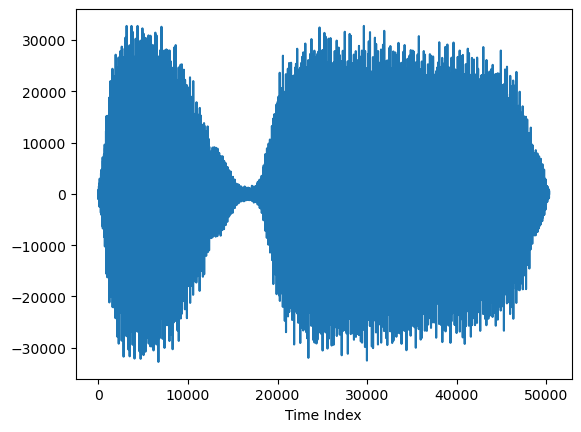

In [82]:
fs1, w = wav.read('train32.wav')                      # Load audio file
print('Sampling rate: ' + str(fs1) + 'Hz')                # Extract sampling frequency

plt.figure()    
_ = plt.plot(np.arange(np.size(w)), w)
plt.xlabel("Time Index")


In [ ]:
# your code of task 2 goes below

def time_scale(signal, a, fs):
    """
    Perform time scaling on an audio waveform.

    Args:
        signal (numpy array): Input numpy array.
        a (float): Time scaling factor.
        fs (int): Sampling frequency (used to handle time shift in seconds if needed).
    
    Returns:
        numpy array: Transformed waveform.
    """
    n = np.arange(len(signal))  # Original time indices
    
    if a > 1: # signal compression
        # your code here
    elif a < 1 and a > 0: # signal expansion
        # your code here
    elif a == 1:
        transformed_signal = signal
    else:
        print("Invalid choice of a")

    return transformed_signal


In [21]:
# your code goes here

def time_scale(signal, a, fs):
    """
    Perform time scaling on an audio waveform.

    Args:
        signal (numpy array): Input numpy array.
        a (float): Time scaling factor.
        fs (int): Sampling frequency (used to handle time shift in seconds if needed).
    
    Returns:
        numpy array: Transformed waveform.
    """
    n = np.arange(len(signal))  # Original time indices
    
    if a > 1: # signal compression (faster playback, shorter duration)
        # Interpolate to get values at scaled time indices
        new_indices = n * a
        # Only keep indices that are within the original signal bounds
        valid_mask = new_indices < len(signal)
        new_indices = new_indices[valid_mask]
        # Interpolate the signal at the new time positions
        transformed_signal = np.interp(new_indices, n, signal)

    elif a < 1 and a > 0: # signal expansion (slower playback, longer duration)
        # Create expanded time axis
        new_length = int(len(signal) / a)
        new_indices = np.arange(new_length) * a
        # Interpolate the signal at the new time positions
        transformed_signal = np.interp(new_indices, n, signal)
                                       
    elif a == 1:
        transformed_signal = signal
    else:
        print("Invalid choice of a")

    return transformed_signal

In [23]:
# your code goes here
def time_shift(signal, b):
    """
    Perform time shifting on a signal.
    
    Args:
        signal (numpy array): Input numpy array.
        b (int): Time shifting factor.
        fs (int): Sampling frequency (used to handle time shift in seconds if needed).
    
    Returns:
        numpy array: Transformed waveform.
    """
    
    # Check if `b` is a valid integer
    if not isinstance(b, int):
        raise ValueError("Invalid choice of b.")
    
    # Perform time shifting
    transformed_signal = np.roll(signal, b)
    
    # Handle zero-padding for positive or negative shifts
    if b > 0:
        transformed_signal[:b] = 0  # Zero-pad the beginning
    elif b < 0:
        transformed_signal[b:] = 0  # Zero-pad the end
    
    return transformed_signal

## Task 3: Volume Variations

In [ ]:
# Volume Variation Function Attack, Decay, Sustain and Release (ADSR)
def adsr(note):
    """Generates an ADSR envelope and applies it to a note.

        A: Linear increase to 60% amplitude over 20% length.
        D: Linear decrease to 50% amplitude over 4% length.
        S: Constant 50% amplitude over 40% length.
        R: Linear decrease to 0% amplitude over 36% length.

    Args:
        note: The note to be modified.

    Returns:
        A note that has been scaled by the ADSR envelope.
    """
    # Enter code here

    length = len(note)
    envelope = np.zeros(length)
    
    attack_len = int(0.20 * length)
    decay_len = int(0.04 * length)
    sustain_len = int(0.40 * length)
    release_len = int(0.36 * length)
    
    # Attack phase: Linear increase from 0 to 0.6
    envelope[:attack_len] = np.linspace(0, 0.6, attack_len)
    
    # Decay phase: Linear decrease from 0.6 to 0.5
    decay_start = attack_len
    decay_end = decay_start + decay_len
    envelope[decay_start:decay_end] = np.linspace(0.6, 0.5, decay_len)
    
    # Sustain phase: Constant at 0.5
    sustain_start = decay_end
    sustain_end = sustain_start + sustain_len
    envelope[sustain_start:sustain_end] = 0.5
    
    # Release phase: Linear decrease from 0.5 to 0
    release_start = sustain_end
    release_end = release_start + release_len
    envelope[release_start:release_end] = np.linspace(0.5, 0, release_len)
    
    # Handle any remaining samples (due to rounding)
    if release_end < length:
        envelope[release_end:] = 0
    
    # Apply the envelope to the note
    modified_note = note * envelope
    
    return modified_note

Original Audio:



Audio with ADSR Envelope Applied:


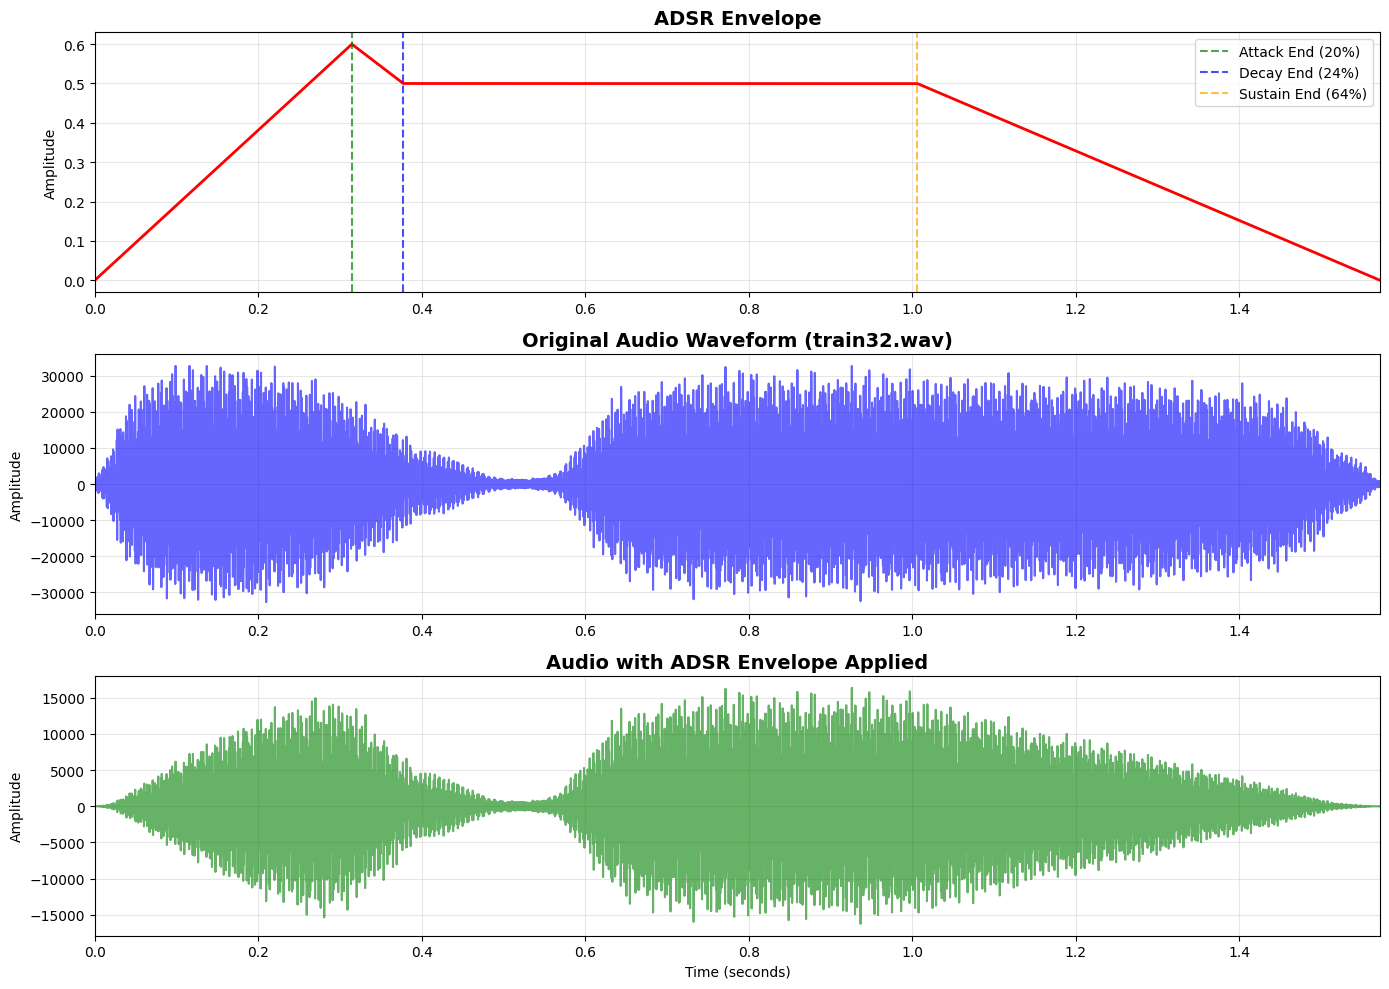


=== ADSR Envelope Parameters ===
Total Length: 50313 samples (1.572 seconds)
Sampling Rate: 32000 Hz

Phase Breakdown:
Attack (A):   10062 samples (0.314s) - 20% | 0% → 60% amplitude
Decay (D):     2012 samples (0.063s) - 4%  | 60% → 50% amplitude
Sustain (S):  20125 samples (0.629s) - 40% | 50% constant amplitude
Release (R):  18112 samples (0.566s) - 36% | 50% → 0% amplitude

Total: 50311 samples


In [31]:
# Use your function Apply an ADSR envelope to each note.
fs1, w = wav.read('train32.wav')
modified_audio = adsr(w)

# Play the audio sample
import IPython.display as ipd
print("Original Audio:")
ipd.display(ipd.Audio(w, rate=fs1))
print("\nAudio with ADSR Envelope Applied:")
ipd.display(ipd.Audio(modified_audio, rate=fs1))

# Display the envelope
length = len(w)
envelope = np.zeros(length)
attack_len = int(0.20 * length)
decay_len = int(0.04 * length)
sustain_len = int(0.40 * length)
release_len = int(0.36 * length)
envelope[:attack_len] = np.linspace(0, 0.6, attack_len)
decay_start = attack_len
decay_end = decay_start + decay_len
envelope[decay_start:decay_end] = np.linspace(0.6, 0.5, decay_len)
sustain_start = decay_end
sustain_end = sustain_start + sustain_len
envelope[sustain_start:sustain_end] = 0.5
release_start = sustain_end
release_end = release_start + release_len
envelope[release_start:release_end] = np.linspace(0.5, 0, release_len)
if release_end < length:
    envelope[release_end:] = 0

plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
time_axis = np.arange(length) / fs1
plt.plot(time_axis, envelope, 'r-', linewidth=2)
plt.title('ADSR Envelope', fontsize=14, fontweight='bold')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)

plt.axvline(x=attack_len/fs1, color='g', linestyle='--', alpha=0.7, label='Attack End (20%)')
plt.axvline(x=decay_end/fs1, color='b', linestyle='--', alpha=0.7, label='Decay End (24%)')
plt.axvline(x=sustain_end/fs1, color='orange', linestyle='--', alpha=0.7, label='Sustain End (64%)')
plt.legend(loc='upper right')
plt.xlim(0, length/fs1)

plt.subplot(3, 1, 2)
plt.plot(time_axis, w, 'b-', alpha=0.6)
plt.title('Original Audio Waveform (train32.wav)', fontsize=14, fontweight='bold')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.xlim(0, length/fs1)


plt.subplot(3, 1, 3)
plt.plot(time_axis, modified_audio, 'g-', alpha=0.6)
plt.title('Audio with ADSR Envelope Applied', fontsize=14, fontweight='bold')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
plt.grid(True, alpha=0.3)
plt.xlim(0, length/fs1)

plt.tight_layout()
plt.show()


print("\n=== ADSR Envelope Parameters ===")
print(f"Total Length: {length} samples ({length/fs1:.3f} seconds)")
print(f"Sampling Rate: {fs1} Hz")
print(f"\nPhase Breakdown:")
print(f"Attack (A):  {attack_len:6d} samples ({attack_len/fs1:.3f}s) - 20% | 0% → 60% amplitude")
print(f"Decay (D):   {decay_len:6d} samples ({decay_len/fs1:.3f}s) - 4%  | 60% → 50% amplitude")
print(f"Sustain (S): {sustain_len:6d} samples ({sustain_len/fs1:.3f}s) - 40% | 50% constant amplitude")
print(f"Release (R): {release_len:6d} samples ({release_len/fs1:.3f}s) - 36% | 50% → 0% amplitude")
print(f"\nTotal: {attack_len + decay_len + sustain_len + release_len} samples")


**Supplementary Questions:** Instead of enveloping with the ADSR function, how would you envelope with a decaying exponential?

## Task 4: Overlapping Notes

In [8]:
def overlap(notes, offset):
    """Joins notes together with overlap between consecutive notes.

    Args:
        notes: An array of notes to be joined.
        offset: The amount of allowable overlap between consecutive notes.

    Returns:
        A score made from the input notes.
    """
    # Enter code here

In [29]:
# Smooth the sound by overlapping the notes.


# Play the audio sample


# Display the envelope